In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Penggalian Data/Modul 5/credit_data.csv')

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Column {col} contains non-numeric values and will be dropped.")
            df.drop(columns=[col], inplace=True)

df.fillna(df.mean(), inplace=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_features, columns=df.columns)


Column CUST_ID contains non-numeric values and will be dropped.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

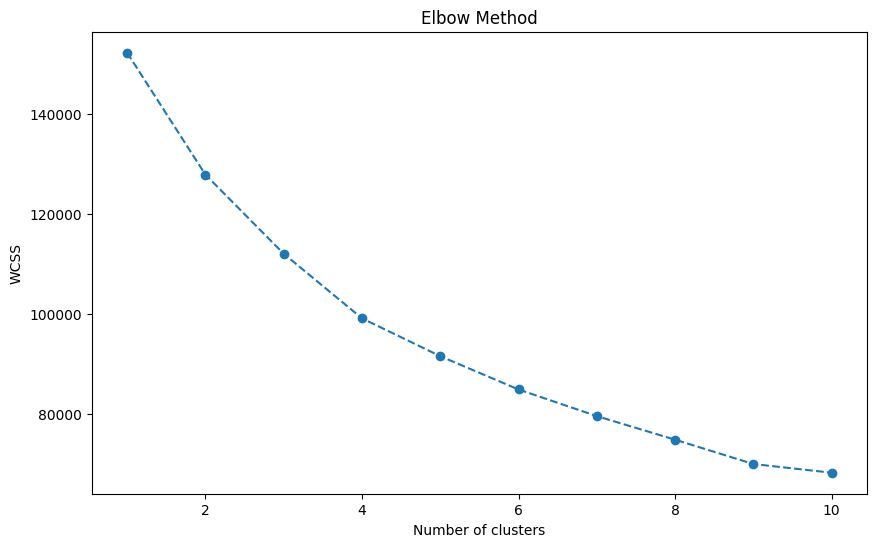

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters
scaled_df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(df.columns)
print(scaled_df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')


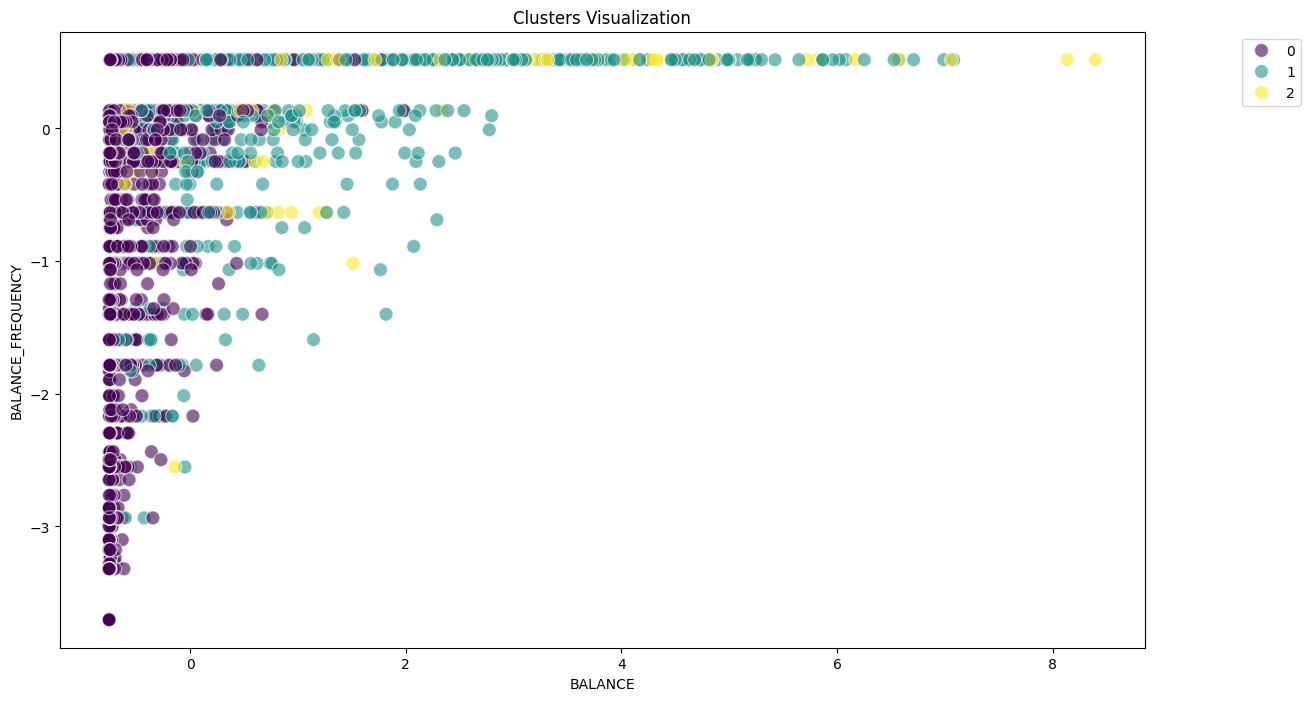

<Figure size 1400x800 with 0 Axes>

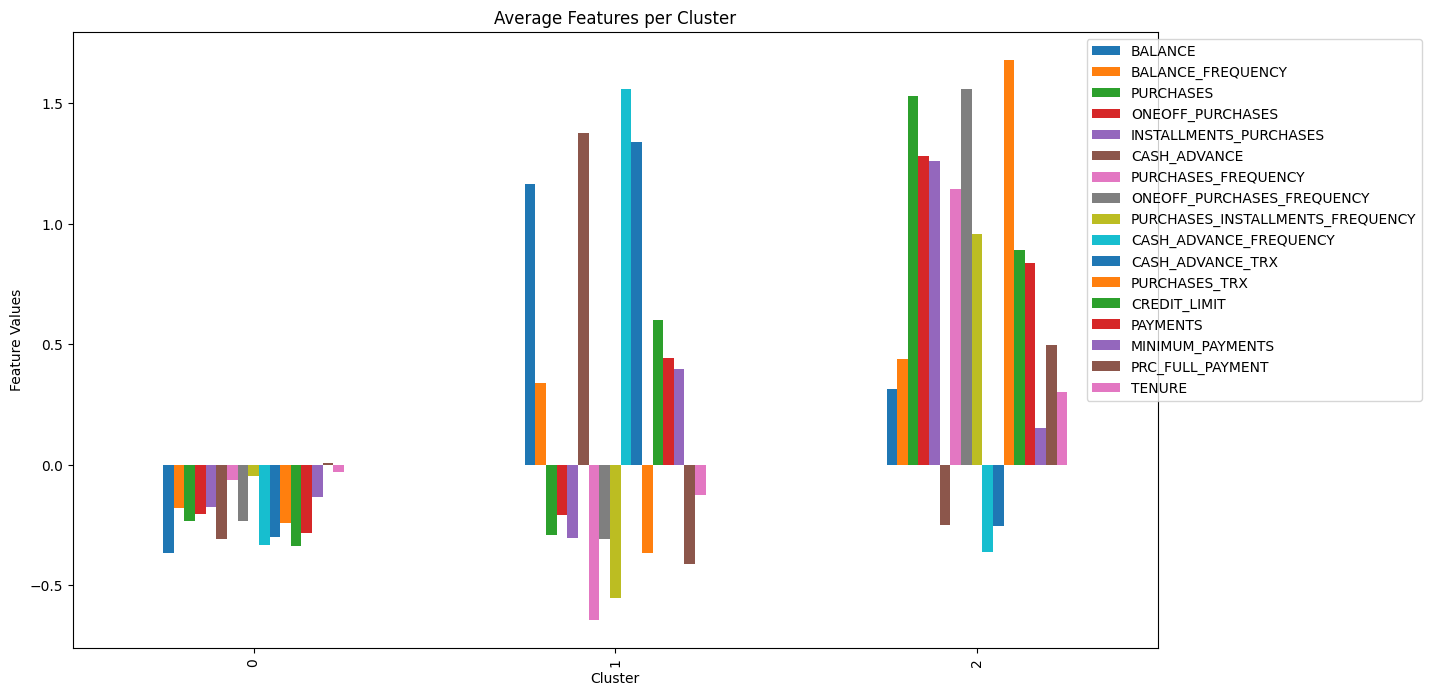

In [ ]:
numerical_columns = scaled_df.columns[:-1]
feature_x = numerical_columns[0]
feature_y = numerical_columns[1]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=scaled_df, x=feature_x, y=feature_y, hue='Cluster', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters Visualization')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

cluster_means = scaled_df.groupby('Cluster').mean()

plt.figure(figsize=(14, 8))
cluster_means.plot(kind='bar', figsize=(14, 8))
plt.title('Average Features per Cluster')
plt.ylabel('Feature Values')
plt.xlabel('Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate

cluster_descriptions = {
    0: 'Pengguna Aktif dengan Limit Tinggi',
    1: 'Pengguna Pasif dengan Limit Rendah',
    2: 'Pengguna Sedang dengan Aktivitas Rata-rata'
}

cluster_stats = []

for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster].describe().transpose()
    cluster_data['Cluster'] = f'Cluster {cluster} ({cluster_descriptions[cluster]})'
    cluster_stats.append(cluster_data)

combined_stats = pd.concat(cluster_stats)

combined_stats.reset_index(inplace=True)
combined_stats.rename(columns={'index': 'Feature'}, inplace=True)

print(tabulate(combined_stats, headers='keys', tablefmt='grid'))

+----+----------------------------------+---------+--------------+--------------+------------+-------------+-------------+--------------+--------------+--------------------------------------------------------+
|    | Feature                          |   count |         mean |          std |        min |         25% |         50% |          75% |          max | Cluster                                                |
+====+==================================+=========+==============+==============+============+=============+=============+==============+==============+========================================================+
|  0 | BALANCE                          |    6118 |  799.771     |  956.279     |   0        |   57.5043   |  424.889    |  1242.64     |  5941.27     | Cluster 0 (Pengguna Aktif dengan Limit Tinggi)         |
+----+----------------------------------+---------+--------------+--------------+------------+-------------+-------------+--------------+--------------+--------